# Part 1. Working with variables.

In this part, we will learn how to handle categorical variables, since it is not enough to encode them as numbers (this sets some order, which may not be on categorical variables). There are two main ways to handle categorical values:
- One-hot coding
- Counters (CTR, mean-target coding, ...) — each categorical feature is replaced by the average value of the target variable for all objects that have the same value in this feature.

Let's start with one-hot coding. Suppose our categorical feature $f_j(x)$ takes values ​​from the set $C=\{c_1, \dots, c_m\}$. Let's replace it with $m$ binary features $b_1(x), \dots, b_m(x)$, each of which is an indicator of one of the possible categorical values:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Data preparation.__

Download [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). This dataset contains information about bank telephone marketing, the object in it is a phone call to a potential client with an offer of some service (it is alleged that this is a short-term deposit), the target variable is the client's response (did he/she agree to open a deposit?). Characteristics of the client (education, marriage, etc.), call data and various economic indicators are used as an indicative description - more detailed information is presented in the `bank-additional-names.txt` file.

In [1]:
import pandas as pd

In [2]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
#!unzip bank-additional.zip
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Task 3.__ Divide the sample into training and testing in a ratio of 3:1. Fix `random_state=777`, also use `stratify`. One of the columns in the data does not carry information for solving the problem - which one? Drop it.

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Default Column Distribution')]

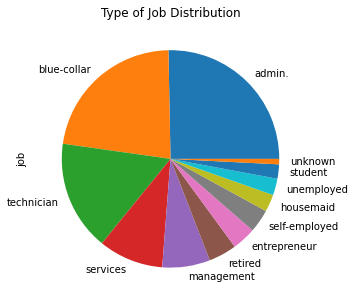

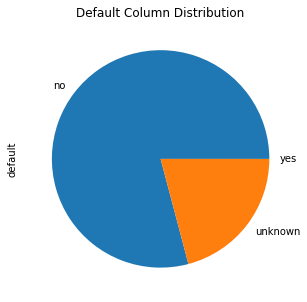

In [6]:
job_count = df['job'].value_counts()
job_count
plt.figure(figsize = (8, 5))
job_count.plot(kind = "pie")
plt.title("Type of Job Distribution")
default_count = df['default'].value_counts()
plt.figure(figsize = (8, 5))
default_count.plot(kind='pie').set(title='Default Column Distribution')

In [7]:
job_count

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

[Text(0.5, 1.0, 'Merital Distribution')]

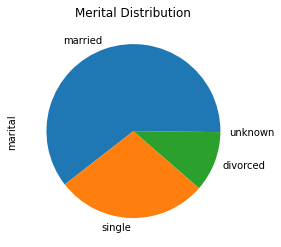

In [8]:
marital_count = df['marital'].value_counts()
marital_count.plot(kind = "pie").set(title = "Merital Distribution")

[Text(0.5, 1.0, 'Loan Distribution')]

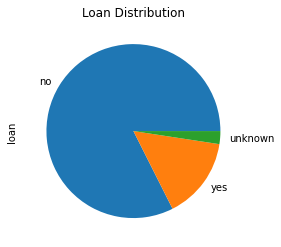

In [9]:
loan_count = df['loan'].value_counts()
loan_count.plot(kind = "pie").set(title = "Loan Distribution")

[Text(0.5, 1.0, 'Housing Loan Distribution')]

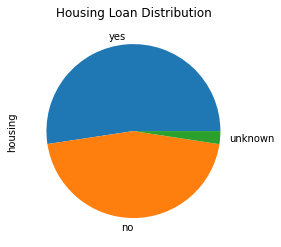

In [10]:
housing_count = df['housing'].value_counts()
housing_count.plot(kind = "pie").set(title = "Housing Loan Distribution")

[Text(0.5, 1.0, 'Education Column Distribution')]

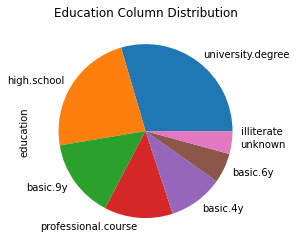

In [11]:
education_count = df['education'].value_counts()
education_count.plot(kind = "pie").set(title = "Education Column Distribution")

[Text(0.5, 1.0, 'Contact Column Distribution')]

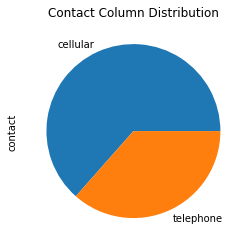

In [12]:
contact_count = df['contact'].value_counts()
contact_count.plot(kind = "pie").set(title = "Contact Column Distribution")

[Text(0.5, 1.0, 'Month Data Distribution')]

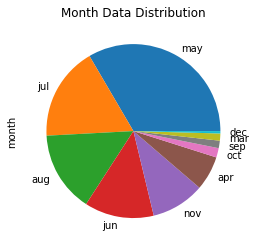

In [13]:
month_count = df['month'].value_counts()
month_count.plot(kind = "pie").set(title = "Month Data Distribution")

In [14]:
bins = [i for i in range(1,20,1)]

<AxesSubplot:>

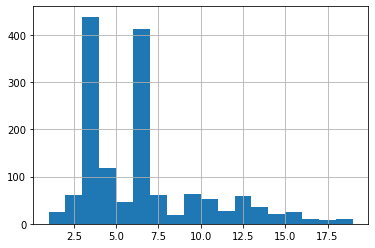

In [15]:
df['pdays'].hist(bins = bins,range =(0, 30))

[Text(0.5, 1.0, 'y Distribution')]

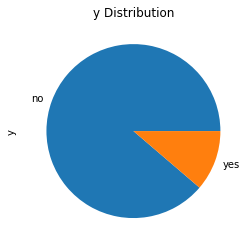

In [16]:
target_count = df['y'].value_counts()
target_count.plot(kind = "pie").set(title = "y Distribution")

Text(0.5, 1.0, 'Client has subscribed a term deposite')

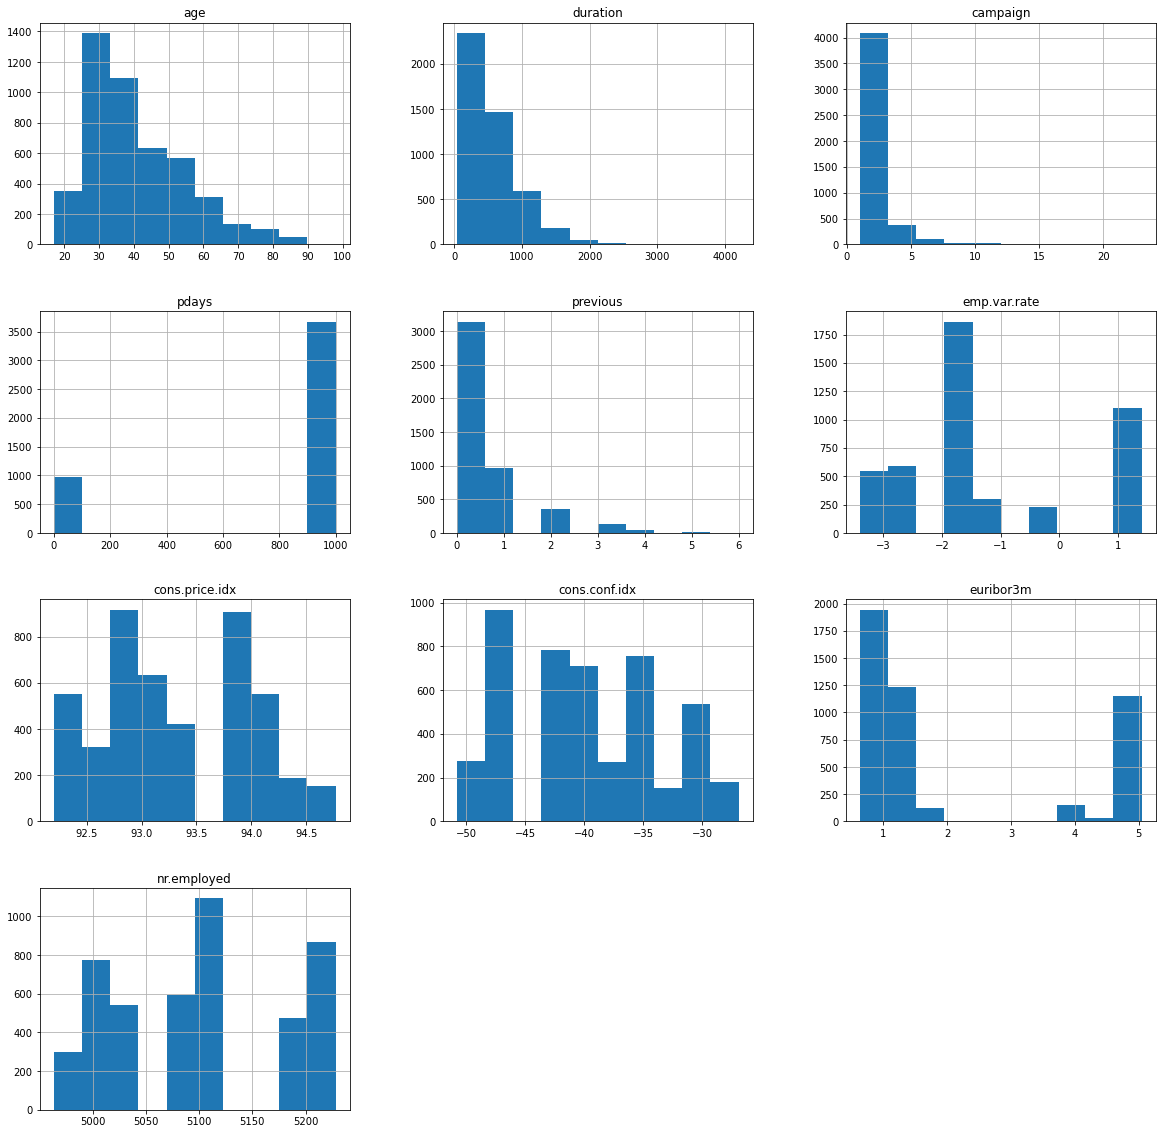

In [17]:
df[df['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')

Text(0.5, 1.0, 'Client has not subscribed a term deposite')

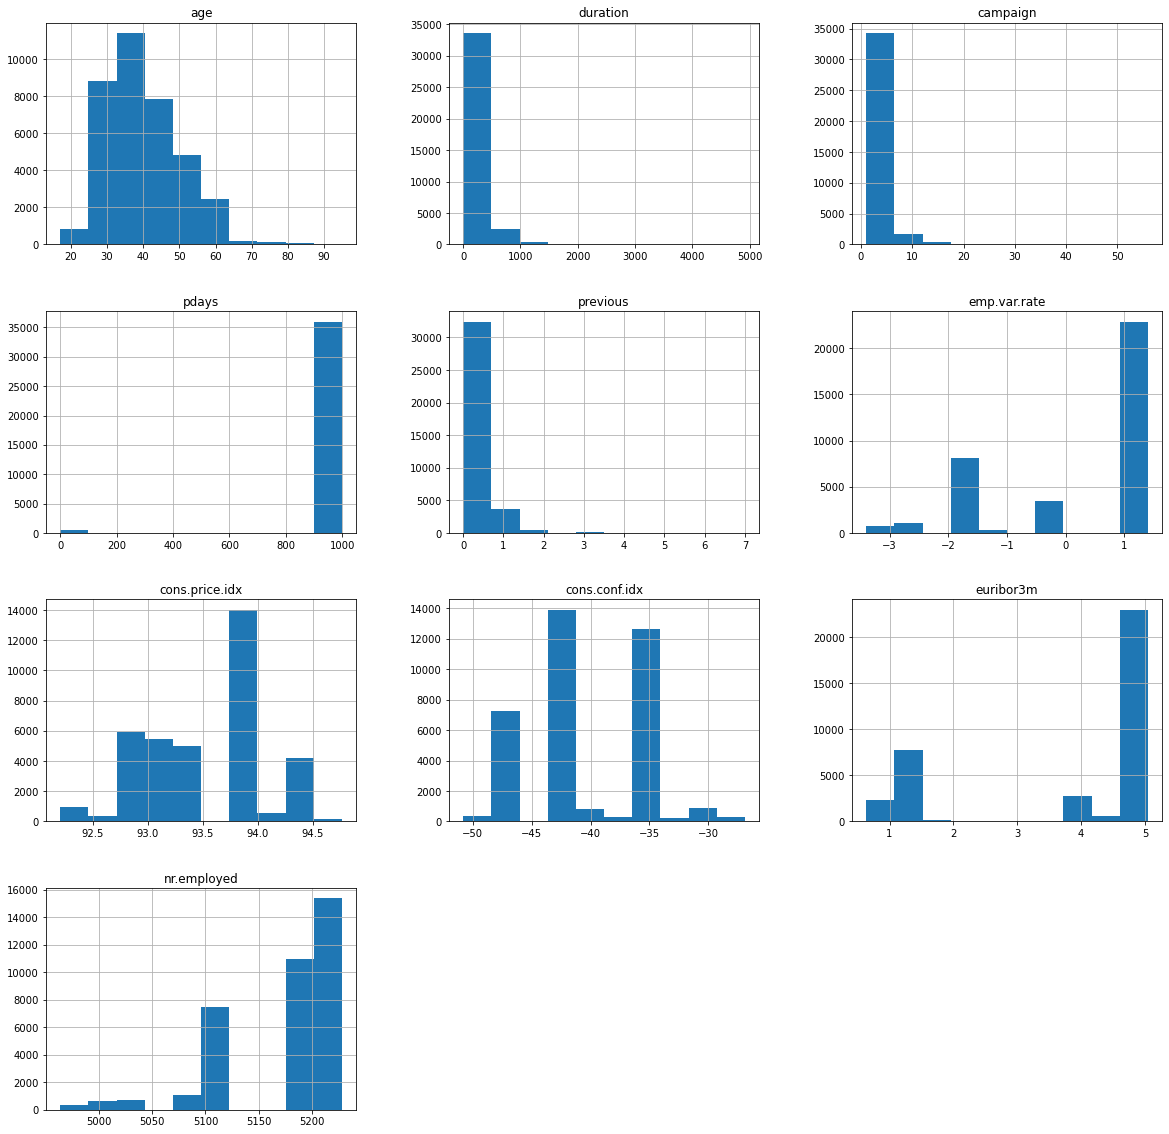

In [18]:
df[df['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df = df.drop(['contact'], axis=1)

Encode categorical features using `OrdinalEncoder`. Calculate the quality (in this task we will work with `AUC-PR`) when applying logistic regression. Measure the time it took to train the model (taking into account feature encoding).

__Question__: why in this task we chose `AUC-PR` as a metric, and not, for example, `AUC-ROC`?

__Your reply__:The commonality between ROC AUC and PR AUC is that they both focus on the prediction scores of the classification model, rather than on the threshold class assignment. However, the difference is that ROC AUC focuses on true positive rate TPR and false positive rate FPR, while PR AUC focuses on positive predictive value PPV and true positive rate TPR.

Therefore, if we are more concerned with the positive class, then using PR AUC, which is more sensitive to improvements in the positive class, is a better choice.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
#your code here

**String-type features need to be encoded in order to be trained, so let's see which features need to be encoded.**

In [22]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [23]:
df

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
df3 = df.copy()

In [25]:
df3 = df3.drop(df3[df3['default'].str.contains('unknown')].index)

In [26]:
df3 = df3.drop(df3[df3['loan'].str.contains('unknown')].index)

In [27]:
df3 = df3.drop(df3[df3['marital'].str.contains('unknown')].index)

In [28]:
df3 = df3.drop(df3[df3['housing'].str.contains('unknown')].index)

In [29]:
df3

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [30]:
df2 = df3.copy()

In [31]:
y = df3['y']
X = df3.drop('y', axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.25, 
random_state= 777, stratify = y)
#your code here

In [32]:
X_train

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32706,39,services,married,high.school,no,no,no,may,mon,410,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1
39232,29,blue-collar,single,professional.course,no,no,yes,mar,tue,207,2,999,1,failure,-1.8,93.369,-34.8,0.652,5008.7
25679,32,entrepreneur,married,high.school,no,yes,no,nov,wed,190,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
4903,28,blue-collar,single,basic.6y,no,no,no,may,wed,244,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
4030,32,admin.,married,high.school,no,no,no,may,mon,70,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,48,admin.,married,high.school,no,no,no,may,tue,82,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
25940,55,technician,married,basic.9y,no,no,yes,nov,wed,113,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8
36896,31,technician,single,university.degree,no,yes,yes,jun,fri,241,5,999,0,nonexistent,-2.9,92.963,-40.8,1.224,5076.2
24546,45,admin.,married,high.school,no,no,no,nov,mon,113,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [33]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,39.132284,260.415659,2.516079,955.940344,0.195214,-0.082305,93.522567,-40.574572,3.449409,5160.230508
std,10.426245,263.390536,2.712754,202.244476,0.526563,1.617866,0.587824,4.809953,1.782255,75.549884
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [34]:
corr_matrix = X_train.corr()

In [35]:
import seaborn as sns

<AxesSubplot:>

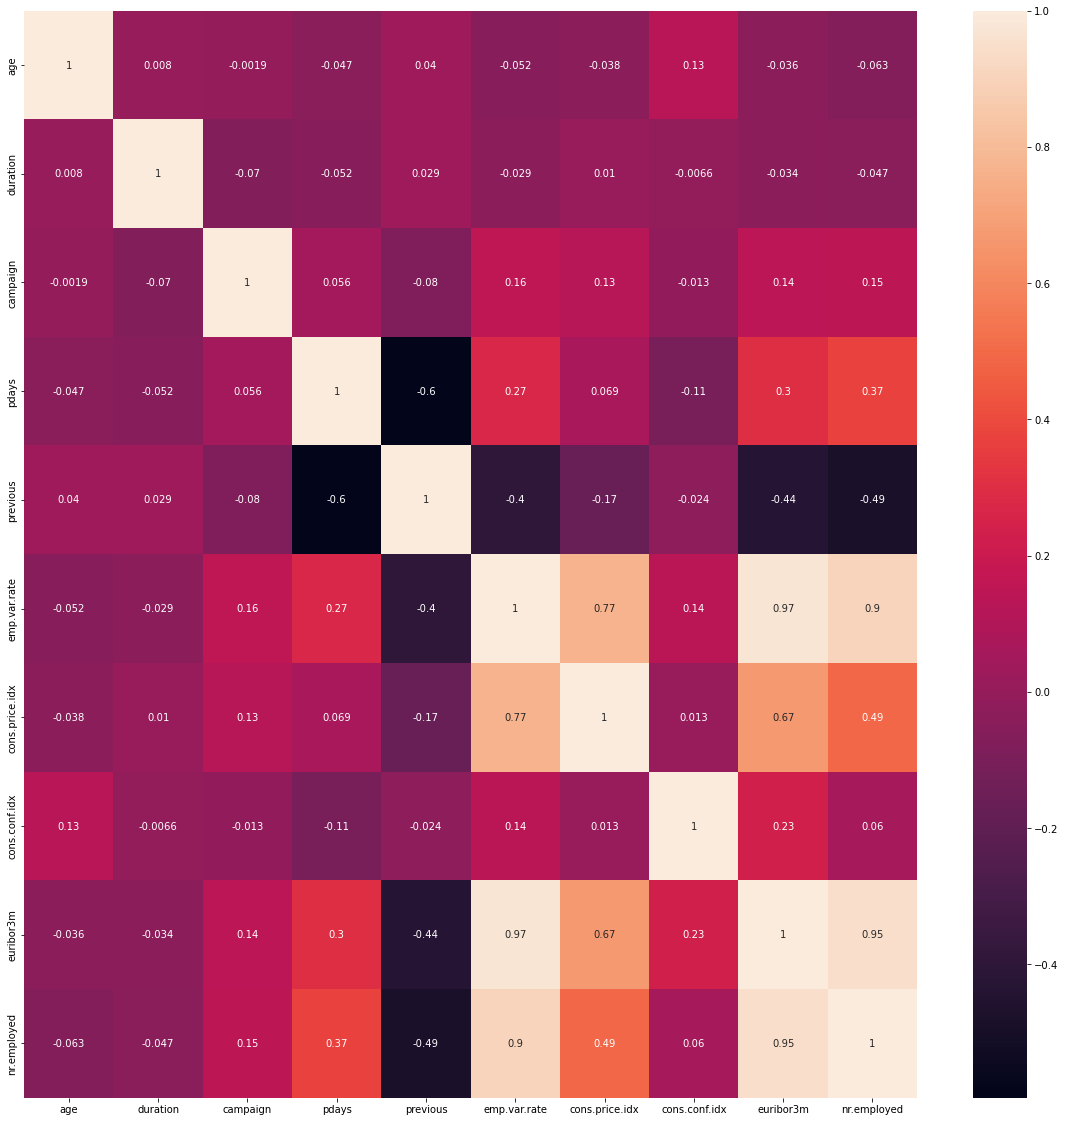

In [36]:
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(X_train[top_corr_features].corr(), annot=True)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [39]:
y_train

32706     no
39232    yes
25679     no
4903      no
4030      no
        ... 
2423      no
25940     no
36896     no
24546     no
5696      no
Name: y, Length: 23820, dtype: object

In [40]:
#y_train= y_train.map({'no':0,'yes':1})
#y_test = y_test.map({'no':0,'yes':1})

In [41]:
y_train

32706     no
39232    yes
25679     no
4903      no
4030      no
        ... 
2423      no
25940     no
36896     no
24546     no
5696      no
Name: y, Length: 23820, dtype: object

In [42]:
X_test

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
30860,29,entrepreneur,married,basic.6y,no,yes,no,may,tue,383,5,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1
15561,24,blue-collar,single,basic.9y,no,no,no,jul,fri,191,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
30044,30,student,single,unknown,no,yes,no,apr,wed,116,4,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
40232,34,technician,single,basic.9y,no,no,no,jul,thu,23,1,999,1,failure,-1.7,94.215,-40.3,0.884,4991.6
19251,33,admin.,single,university.degree,no,yes,yes,aug,wed,102,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,58,services,divorced,professional.course,no,yes,no,may,fri,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1595,32,technician,married,university.degree,no,yes,no,may,fri,93,5,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
28648,48,blue-collar,married,basic.4y,no,no,yes,apr,thu,220,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
10161,36,self-employed,divorced,university.degree,no,yes,no,jun,thu,130,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1


In [43]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
enc=OrdinalEncoder()

enc.fit(X_train)
X_train=enc.transform(X_train)
enc.fit(X_test)
X_test=enc.transform(X_test)

In [44]:
%%time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
enc=OrdinalEncoder()

enc.fit(X_train)
X_train=enc.transform(X_train)
enc.fit(X_test)
X_test=enc.transform(X_test)

#y_train['y'] = y_train['y'].map({'no':0,'yes':1})
#y_test['y'] = y_test['y'].map({'no':0,'yes':1})

#enc.fit(y_test)
#df_train_x_code=enc.transform(y_test)
#enc.fit(y_train)
#df_test_x_code=enc.transform(y_train)

y_test=y_test.apply(lambda x: 0 if x == 'yes' else 1)


classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.7188249871524232
CPU times: user 407 ms, sys: 170 ms, total: 577 ms
Wall time: 309 ms


/Users/wangzuxian/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


__Task 4.__ Encode all categorical features using one-hot coding. Train logistic regression and see how the quality of the model has changed (from what it was before encoding). Measure the time required to encode categorical features and train the model.

In [45]:
df2

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [46]:
marital_dummies = pd.get_dummies(df2['marital'], prefix = 'marital')
pd.concat([df2['marital'], marital_dummies], axis=1).head(n=10)
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
marital_dummies.head()
df2 = pd.concat([df2, marital_dummies], axis=1)
#your code here

In [47]:
job_dummies = pd.get_dummies(df2['job'], prefix = 'job')
df2 = pd.concat([df2, job_dummies], axis=1)

In [48]:
education_dummies = pd.get_dummies(df2['education'], prefix = 'education')
df2 = pd.concat([df2, education_dummies], axis=1)

In [49]:
poutcome_dummies = pd.get_dummies(df2['poutcome'], prefix = 'poutcome')
df2 = pd.concat([df2, poutcome_dummies], axis=1)

In [50]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df2['month'] = df2['month'].map(months)

In [51]:
weeks = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df2['day_of_week'] = df2['day_of_week'].map(weeks)
df2['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [52]:
df2['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [53]:
df2['y']

0         no
2         no
3         no
4         no
6         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 31760, dtype: object

In [54]:
df2

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,was_contacted
0,56,housemaid,married,basic.4y,no,no,no,5,1,261,...,0,0,0,0,0,0,0,1,0,1
2,37,services,married,high.school,no,yes,no,5,1,226,...,0,1,0,0,0,0,0,1,0,1
3,40,admin.,married,basic.6y,no,no,no,5,1,151,...,0,0,0,0,0,0,0,1,0,1
4,56,services,married,high.school,no,no,yes,5,1,307,...,0,1,0,0,0,0,0,1,0,1
6,59,admin.,married,professional.course,no,no,no,5,1,139,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,11,5,334,...,0,0,0,1,0,0,0,1,0,1
41184,46,blue-collar,married,professional.course,no,no,no,11,5,383,...,0,0,0,1,0,0,0,1,0,1
41185,56,retired,married,university.degree,no,yes,no,11,5,189,...,0,0,0,0,1,0,0,1,0,1
41186,44,technician,married,professional.course,no,no,no,11,5,442,...,0,0,0,1,0,0,0,1,0,1


In [55]:
df2['y']=df2['y'].apply(lambda x: 0 if x == 'yes' else 1)

In [56]:
df2.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'pdays', 'poutcome'], axis=1, inplace=True)

In [57]:
y_count = df2['y'].value_counts()
y_count

1    27671
0     4089
Name: y, dtype: int64

In [58]:
df2

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,was_contacted
0,56,5,1,261,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,1,0,1
2,37,5,1,226,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,0,1,0,1
3,40,5,1,151,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,1,0,1
4,56,5,1,307,1,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,0,1,0,1
6,59,5,1,139,1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,1,0,1
41184,46,11,5,383,1,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,1,0,1
41185,56,11,5,189,2,0,-1.1,94.767,-50.8,1.028,...,0,0,0,0,1,0,0,1,0,1
41186,44,11,5,442,1,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,0,1,0,1


In [59]:
y = df2['y']
X = df2.drop('y', axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.25, 
random_state= 777, stratify = y)

In [60]:
X_train

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,was_contacted
27602,57,11,5,294,2,0,-0.1,93.200,-42.0,4.021,...,0,0,0,1,0,0,0,1,0,1
28330,29,4,3,216,1,0,-1.8,93.075,-47.1,1.445,...,0,0,0,0,1,0,0,1,0,1
40350,28,8,2,261,1,1,-1.7,94.027,-38.3,0.899,...,1,0,0,0,0,0,1,0,0,1
31955,35,5,4,195,2,1,-1.8,92.893,-46.2,1.327,...,0,1,0,0,0,0,1,0,0,1
33715,26,5,3,200,2,1,-1.8,92.893,-46.2,1.281,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,41,5,1,247,2,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,1,0,1
3810,33,5,5,71,11,0,1.1,93.994,-36.4,4.859,...,0,0,0,0,1,0,0,1,0,1
36790,32,6,1,532,2,0,-2.9,92.963,-40.8,1.260,...,0,0,0,0,1,0,0,1,0,1
1038,58,5,3,154,2,0,1.1,93.994,-36.4,4.856,...,0,0,0,0,0,0,0,1,0,1


In [61]:
y_train

27602    1
28330    1
40350    0
31955    1
33715    1
        ..
2164     1
3810     1
36790    0
1038     1
34009    1
Name: y, Length: 23820, dtype: int64

In [62]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: user 620 ms, sys: 268 ms, total: 888 ms
Wall time: 243 ms


/Users/wangzuxian/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

### answer：The OrdinalEncoder seems to train 10 percent faster than the one hot encoder, probably because the underlying layer is a hash store.

As it could be replaced, one-hot encoding can greatly increase the number of features in the dataset, which affects memory, especially if some feature has a large number of values. This problem is solved by another way of encoding categorical features - counters. The main idea is that it is not the categories themselves that are important to us, but the values ​​of the target variable that the objects of this category have. We will replace each categorical feature with the average value of the target variable for all objects of the same category:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l } [f_j(x) = f_j(x_i)]}
$$

__Task 5.__ Encode categorical variables with counters (exactly as described above without any tricks). Train logistic regression and look at the quality of the model on the test set. Compare training time with previous experiments (taking into account feature encoding). Did you notice something interesting?


__Bonus__: Here and below, implement the calculation of counters using a transformer (inherit from the `BaseEstimator, TransformerMixin` classes from `sklearn.base`). Please note that all calculations must be vectorized, the transformer must not modify the inplace sample passed to it, and all necessary statistics must be calculated only on the training sample in the `fit` method. Your transformer should take a list of categorical features during initialization and change only them.

In [64]:
df4 = df.copy()
#your code here

In [65]:
df4

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [66]:
from sklearn.base import TransformerMixin, BaseEstimator
class Counter(TransformerMixin, BaseEstimator):
    def __init__(self):
        super(Counter, self).__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, Y=None):
        d = dict()
        x = X[0]
        y = X[1]
        for i in range(len(x)):
            nums = d.get(x[i])
            if nums is None:
                nums = [0, 0]
            nums[0] += 1
            nums[1] += (y[i] - nums[1])/nums[0]
            d[x[i]] = nums
        res = []
        for i in x:
            res.append(d[i][1])
        return res

In [67]:
df4['y']=df4['y'].apply(lambda x: 0 if x == 'yes' else 1)

In [68]:
counter = Counter()

In [69]:
y = df4['y']
X = df4.drop('y', axis=1)

In [70]:
X

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [71]:
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: y, Length: 41188, dtype: int64

In [72]:
feature_set = ['job','marital','education','default','housing','loan','poutcome']

In [73]:
for i in feature_set:
    X[i] = counter.fit_transform([X[i],y])

In [74]:
for i in feature_set:
    df4[i] = df4[i].map(df4.groupby([i])['y'].mean())


In [75]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
X['month'] = X['month'].map(months)
weeks = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
X['day_of_week'] = X['day_of_week'].map(weeks)
X['was_contacted'] = X['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [76]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.25, 
random_state= 777, stratify = y)

In [77]:
X_train

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted
36997,28,0.870274,0.859959,0.862755,0.87121,0.883806,0.886598,7,5,67,2,999,0,0.911678,-2.9,92.469,-33.6,1.059,5076.2,1
1358,41,0.870274,0.898427,0.921754,0.94847,0.883806,0.886598,5,4,161,1,999,0,0.911678,1.1,93.994,-36.4,4.855,5191.0,1
31889,33,0.931057,0.898427,0.886515,0.94847,0.891204,0.886598,5,4,153,2,999,0,0.911678,-1.8,92.893,-46.2,1.327,5099.1,1
26114,32,0.891740,0.898427,0.886515,0.87121,0.883806,0.890685,11,3,196,3,999,1,0.857714,-0.1,93.200,-42.0,4.120,5195.8,1
11982,29,0.931057,0.896791,0.897510,0.94847,0.891204,0.886598,6,3,231,1,999,0,0.911678,1.4,94.465,-41.8,4.958,5228.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,27,0.685714,0.859959,0.891645,0.87121,0.883806,0.886598,12,2,396,1,999,0,0.911678,-3.0,92.713,-33.0,0.708,5023.5,1
9965,35,0.931057,0.898427,0.917976,0.94847,0.891204,0.886598,6,3,147,4,999,0,0.911678,1.4,94.465,-41.8,4.959,5228.1,1
36620,26,0.931057,0.859959,0.886515,0.87121,0.883806,0.886598,6,4,77,2,999,0,0.911678,-2.9,92.963,-40.8,1.260,5076.2,1
18160,40,0.870274,0.898427,0.862755,0.94847,0.883806,0.886598,7,3,340,1,999,0,0.911678,1.4,93.918,-42.7,4.963,5228.1,1


In [78]:
%%time
classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9891831752849769
CPU times: user 346 ms, sys: 177 ms, total: 523 ms
Wall time: 323 ms


/Users/wangzuxian/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Note that such features are classifiers in themselves and, learning from them, we allow the target variable to “leak” into features. This leads to overfitting, so it is necessary to count such features in such a way that when calculating for a particular object, its target label is not used. This can be done in the following ways:
1. Calculate the counter value for all objects located higher in the dataset (for example, if we have a selection sorted by time).
2. Calculate by folds, that is, divide the sample into a certain number of parts and calculate the value of features for all folds except the current one (as is done in cross-validation).
3. Introduction of some noise into the calculated features.

__Task 6.__ Implement correct calculation of counters in the simplest way - adding noise to the values ​​(try to find a balance between fighting overfitting and keeping the features useful). Train logistic regression again, evaluate the quality. Draw your own conclusions.

__(Bonus part)__ Calculate the correct counters in the first or second way described above (don't forget to add noise).

In [79]:
import warnings

warnings.filterwarnings('ignore')

In [80]:
def log_auc_pr(X_train,y_train,X_test,y_test):   
    classifier = LogisticRegression(random_state=777)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    # Use AUC function to calculate the area under the curve of precision recall curve
    auc_precision_recall = auc(recall, precision)
    return auc_precision_recall

In [81]:
def add_noise(X_train,X_test,columns,scale):
    X_train, X_test = X_train.copy(), X_test.copy()
    for column in columns:
        X_train[column] += np.random.normal(scale = scale,size = len(X_train))
        X_test[column] += np.random.normal(scale, size = len(X_test))
    return X_train, X_test

In [82]:
X_train

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted
36997,28,0.870274,0.859959,0.862755,0.87121,0.883806,0.886598,7,5,67,2,999,0,0.911678,-2.9,92.469,-33.6,1.059,5076.2,1
1358,41,0.870274,0.898427,0.921754,0.94847,0.883806,0.886598,5,4,161,1,999,0,0.911678,1.1,93.994,-36.4,4.855,5191.0,1
31889,33,0.931057,0.898427,0.886515,0.94847,0.891204,0.886598,5,4,153,2,999,0,0.911678,-1.8,92.893,-46.2,1.327,5099.1,1
26114,32,0.891740,0.898427,0.886515,0.87121,0.883806,0.890685,11,3,196,3,999,1,0.857714,-0.1,93.200,-42.0,4.120,5195.8,1
11982,29,0.931057,0.896791,0.897510,0.94847,0.891204,0.886598,6,3,231,1,999,0,0.911678,1.4,94.465,-41.8,4.958,5228.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,27,0.685714,0.859959,0.891645,0.87121,0.883806,0.886598,12,2,396,1,999,0,0.911678,-3.0,92.713,-33.0,0.708,5023.5,1
9965,35,0.931057,0.898427,0.917976,0.94847,0.891204,0.886598,6,3,147,4,999,0,0.911678,1.4,94.465,-41.8,4.959,5228.1,1
36620,26,0.931057,0.859959,0.886515,0.87121,0.883806,0.886598,6,4,77,2,999,0,0.911678,-2.9,92.963,-40.8,1.260,5076.2,1
18160,40,0.870274,0.898427,0.862755,0.94847,0.883806,0.886598,7,3,340,1,999,0,0.911678,1.4,93.918,-42.7,4.963,5228.1,1


In [83]:
import numpy as np
np.random.seed(11)
object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

for scale in np.linspace(1e-2, 5e-1, 10):
    X_train_noise, X_test_noies = add_noise(X_train, X_test, object_columns, scale = scale)
    apr = log_auc_pr(X_train_noise, y_train, X_test_noies, y_test)
    print('scale:', scale, ',auc_pr', apr)

scale: 0.01 ,auc_pr 0.9891751602882927
scale: 0.06444444444444444 ,auc_pr 0.9891763195775763
scale: 0.11888888888888888 ,auc_pr 0.9892163780659243
scale: 0.17333333333333334 ,auc_pr 0.9892658991797164
scale: 0.22777777777777777 ,auc_pr 0.9891120373510421
scale: 0.2822222222222222 ,auc_pr 0.989175084200694
scale: 0.33666666666666667 ,auc_pr 0.989051868508787
scale: 0.3911111111111111 ,auc_pr 0.9891070257965959
scale: 0.44555555555555554 ,auc_pr 0.9890879521977936
scale: 0.5 ,auc_pr 0.9891879247146073


In [84]:
#your code here

In [85]:
#your code here

Now answer the following question: what happens if a certain category occurs in the sample only a few times? For this reason, counters are smoothed. For example, in practice, good results are shown by using smoothing by means of the entire sample:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_ {i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
where $global\_mean$ is the proportion of objects of a positive class in the sample, $C$ is a parameter that determines the degree of smoothing (for example, you can use 10 or choose your own for each feature). The main idea is that we "dilute" the average for some category with the global average. And the less, the more objects of this category are found in the sample.

However, for smoothing, instead of the average value of the target variable, you can use any other value from 0 to 1 (this parameter is sometimes called $prior$). You can make several features with different parameter values. In practice, even negative values can be useful in binary classification problems!

__Task 7.__ Add the smoothing described above and repeat the experiments..

In [86]:
C = 10
df5 = df.copy()
#your code here

In [87]:
df5

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [88]:
target_count = df5['y'].value_counts()

In [89]:
target_count

no     36548
yes     4640
Name: y, dtype: int64

In [90]:
global_mean = target_count.yes /(target_count.no + target_count.yes)

In [91]:
def xxx(df, col, C, global_mean):
    g = df.groupby(col)
    res = dict()
    for k, d in g:
        cs = d['y'].value_counts()
        if 'yes' in cs:
            v =  (cs.yes + C * global_mean)/ (len(d) + C)
        else:
            v = 0
        res[k] = v
        df[col].replace(k, v)
    return df.replace({col : res})

object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
df6 = df5.copy()
for col in object_columns:
    df6 = xxx(df6, col, C, global_mean)
df6

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100118,0.101577,0.102515,0.128785,0.108798,0.113402,may,mon,261,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.081459,0.101577,0.108360,0.051601,0.108798,0.113402,may,mon,149,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.081459,0.101577,0.108360,0.128785,0.116192,0.113402,may,mon,226,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.129709,0.101577,0.082157,0.128785,0.108798,0.113402,may,mon,151,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.081459,0.101577,0.108360,0.128785,0.108798,0.109320,may,mon,307,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.251518,0.101577,0.113483,0.128785,0.116192,0.113402,nov,fri,334,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.068990,0.101577,0.113483,0.128785,0.108798,0.113402,nov,fri,383,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.251518,0.101577,0.137225,0.128785,0.116192,0.113402,nov,fri,189,2,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.108267,0.101577,0.113483,0.128785,0.108798,0.113402,nov,fri,442,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,yes


In [92]:
#months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df6['month'] = df6['month'].map(months)
#weeks = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df6['day_of_week'] = df6['day_of_week'].map(weeks)

In [93]:
df6

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100118,0.101577,0.102515,0.128785,0.108798,0.113402,5,1,261,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.081459,0.101577,0.108360,0.051601,0.108798,0.113402,5,1,149,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.081459,0.101577,0.108360,0.128785,0.116192,0.113402,5,1,226,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.129709,0.101577,0.082157,0.128785,0.108798,0.113402,5,1,151,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.081459,0.101577,0.108360,0.128785,0.108798,0.109320,5,1,307,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.251518,0.101577,0.113483,0.128785,0.116192,0.113402,11,5,334,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.068990,0.101577,0.113483,0.128785,0.108798,0.113402,11,5,383,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.251518,0.101577,0.137225,0.128785,0.116192,0.113402,11,5,189,2,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.108267,0.101577,0.113483,0.128785,0.108798,0.113402,11,5,442,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,yes


In [94]:
df6['y']=df6['y'].apply(lambda x: 0 if x == 'yes' else 1)

In [95]:
y = df6['y']
X = df6.drop('y', axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.25, 
random_state= 777, stratify = y)

In [96]:
log_auc_pr(X_train, y_train,X_test, y_test)

0.989042573493449

__Task 8.__ The data contains the feature "client's age". Now we interpret it as a numerical one, which in the general case for a linear model may be an incorrect hypothesis. However, this feature has quite a few unique values (how many?), so applying one-hot encoding to it may be redundant. Try to encode age with counters. Has it gotten better?

## unique values

In [97]:
df7 = df.copy()
#your code here

In [98]:
df6.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [99]:
plt_age = df6['age'].value_counts()

[Text(0.5, 1.0, 'y Distribution')]

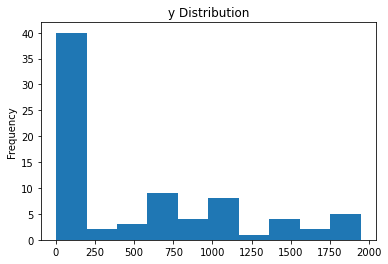

In [100]:
plt_age.plot(kind = "hist").set(title = "y Distribution")

In [101]:
df6['age'] = counter.fit_transform([df6['age'],df6['y']])

In [102]:
df6

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.886364,0.100118,0.101577,0.102515,0.128785,0.108798,0.113402,5,1,261,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,1
1,0.904025,0.081459,0.101577,0.108360,0.051601,0.108798,0.113402,5,1,149,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,1
2,0.907119,0.081459,0.101577,0.108360,0.128785,0.116192,0.113402,5,1,226,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,1
3,0.927649,0.129709,0.101577,0.082157,0.128785,0.108798,0.113402,5,1,151,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,1
4,0.886364,0.081459,0.101577,0.108360,0.128785,0.108798,0.109320,5,1,307,1,999,0,0.088329,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.617647,0.251518,0.101577,0.113483,0.128785,0.116192,0.113402,11,5,334,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,0
41184,0.923301,0.068990,0.101577,0.113483,0.128785,0.108798,0.113402,11,5,383,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,1
41185,0.886364,0.251518,0.101577,0.137225,0.128785,0.116192,0.113402,11,5,189,2,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,1
41186,0.923838,0.108267,0.101577,0.113483,0.128785,0.108798,0.113402,11,5,442,1,999,0,0.088329,-1.1,94.767,-50.8,1.028,4963.6,0


In [103]:
y = df6['y']
X = df6.drop('y', axis=1)
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size =0.25, 
random_state= 777, stratify = y)

In [104]:
log_auc_pr(X_train, y_train,X_test, y_test)

0.9891035818629396

## answers: Improved accuracy a little

You can also go in the opposite direction. We have signs "month and day of the week" for the call. Try to interpret them as numbers (month 0 to 12, days of the week 0 to 4). Did it get better this time?


## Since adding more columns to the heat code will slow down the calculation, it is faster to train by directly reducing the month and week codes by many columns.In all previous training the times have been interpreted as corresponding numbers.

In [105]:
#your code here

__Note.__ Complicating methods for calculating counters does not guarantee better model results. Especially considering that logistic regression is not such a complex model to retrain. So you didn't have to get better and better results at each step (but you should have got the necessary results).

As you should have noticed, counters are a good alternative to one-hot coding. Write what pros and cons of using counters compared to one-hot coding you noticed.

__Answer:__One-hot coding is not very easy to use, especially for all samples, especially when it comes to numerical samples, it will break up the samples, and will add many columns, making the sample training more slow. The counter has the advantage of being efficient and calculates the prior probability, making it more in line with statistical science.

# Part 2. Feature Selection

Feature selection is an important part of the model building process. In practice, many features have little effect on the model (and their calculation takes time) or even negatively affect the quality of the model. Let's try several feature selection approaches, evaluate how they affect the quality of the model and how long they take.

Let's turn to the same dataset about bank telephone marketing.

In [106]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [107]:
X = df.drop(columns=['duration', 'y'])
#y = (df.y == 'yes')
#X = df.drop(['y','duartion'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [108]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [109]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


As you remember, there are many categorical features in the data (for now, let's interpret age as a number). Let's encode them using one-hot encoding. The original columns with categorical features can be deleted. How many signs did we get?

In [110]:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [111]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
df = pd.concat([df, marital_dummies], axis=1)
#your code here

In [112]:
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
df = pd.concat([df, job_dummies], axis=1)

In [113]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
df = pd.concat([df, education_dummies], axis=1)

In [114]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
df = pd.concat([df, poutcome_dummies], axis=1)

In [115]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
weeks = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df['day_of_week'] = df['day_of_week'].map(weeks)
df['y']=df['y'].apply(lambda x: 0 if x == 'yes' else 1)
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
df = pd.concat([df, contact_dummies], axis=1)
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'poutcome','contact'], axis=1, inplace=True)

In [116]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41184,46,11,5,383,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41185,56,11,5,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,1,0,1,0
41186,44,11,5,442,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0


In [117]:
df3 = df.copy()

In [118]:
df4 = df.copy()

In [119]:
df5 = df.copy()

In [120]:
df5

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41184,46,11,5,383,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41185,56,11,5,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,1,0,1,0
41186,44,11,5,442,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0


In [121]:
df1 = df.copy()

### If we just make y equal to yes, then putting in logistic regression will reveal that there is only one class, resulting in no way to achieve the classification task.

In [122]:
X = df.drop(columns=['duration', 'y'])
# 
#y = (df.y == 'yes')
#X = df.drop(['y','duartion'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [123]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41184,46,11,5,383,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41185,56,11,5,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,1,0,1,0
41186,44,11,5,442,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0


We will use logistic regression as the main model, and `AUC-PR` as the target metric. Train the model and calculate the quality on the test set. Let's remember the resulting value.

In [124]:
classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9468268679522525


In [125]:
#your code here

### Built-in methods

Let's say we want to keep only the top 40 features. Let's try to do this in several ways.

Let's start with feature selection using a linear model. As you know, the weights of a linear model mean the contribution of each feature to the prediction of the model, which means that the modulus of this contribution can be interpreted as the importance of the features. Such a selection method is called built-in or embedded methods, since it is embedded in the features of the model.

__Task 8.__ Leave 40 features with the largest modulus of the corresponding parameter of the linear model. Retrain the model and evaluate its quality. Measure the speed of such feature selection.

Has the quality changed? How?

In [126]:
col_set = []

In [127]:
for col in X.columns:
    col_set.append(col)
    print(col)

    

age
month
day_of_week
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
marital_divorced
marital_married
marital_single
marital_unknown
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
education_basic.4y
education_basic.6y
education_basic.9y
education_high.school
education_illiterate
education_professional.course
education_university.degree
education_unknown
poutcome_failure
poutcome_nonexistent
poutcome_success
contact_cellular
contact_telephone


In [128]:
col_set

['age',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'contact_cellular',
 'contact_telephone']

In [129]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [130]:
feature_importances = pd.Series(model.feature_importances_, index = col_set)
feature_importances

age                              0.213524
month                            0.017974
day_of_week                      0.073592
campaign                         0.132826
pdays                            0.045363
previous                         0.013944
emp.var.rate                     0.037094
cons.price.idx                   0.023996
cons.conf.idx                    0.025821
euribor3m                        0.127288
nr.employed                      0.046412
marital_divorced                 0.008689
marital_married                  0.012435
marital_single                   0.010830
marital_unknown                  0.000854
job_admin.                       0.012978
job_blue-collar                  0.008872
job_entrepreneur                 0.004747
job_housemaid                    0.004453
job_management                   0.007284
job_retired                      0.007857
job_self-employed                0.005527
job_services                     0.007000
job_student                      0

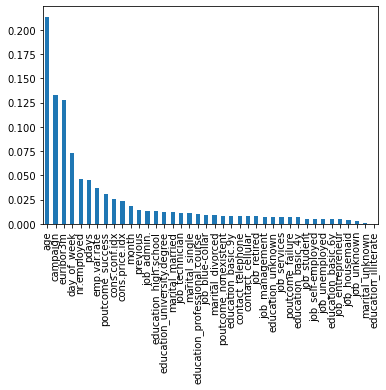

In [131]:
feature_importances.nlargest(40).plot(kind='bar')
plt.show()

In [132]:
feature_importances = feature_importances.sort_values()

In [133]:
best_feature = feature_importances[1:40]

In [134]:
best_feature_set = []

## We now have the best top forty features

In [135]:
for i in best_feature.index:
    best_feature_set.append(i)
best_feature_set

['marital_unknown',
 'job_unknown',
 'job_housemaid',
 'job_entrepreneur',
 'education_basic.6y',
 'job_unemployed',
 'job_self-employed',
 'job_student',
 'education_basic.4y',
 'poutcome_failure',
 'job_services',
 'education_unknown',
 'job_management',
 'job_retired',
 'contact_cellular',
 'contact_telephone',
 'education_basic.9y',
 'poutcome_nonexistent',
 'marital_divorced',
 'job_blue-collar',
 'education_professional.course',
 'marital_single',
 'job_technician',
 'marital_married',
 'education_university.degree',
 'education_high.school',
 'job_admin.',
 'previous',
 'month',
 'cons.price.idx',
 'cons.conf.idx',
 'poutcome_success',
 'emp.var.rate',
 'pdays',
 'nr.employed',
 'day_of_week',
 'euribor3m',
 'campaign',
 'age']

In [136]:
X = df[best_feature_set]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [137]:
X

,marital_unknown,job_unknown,job_housemaid,job_entrepreneur,education_basic.6y,job_unemployed,job_self-employed,job_student,education_basic.4y,poutcome_failure,...,cons.price.idx,cons.conf.idx,poutcome_success,emp.var.rate,pdays,nr.employed,day_of_week,euribor3m,campaign,age
0,0,0,1,0,0,0,0,0,1,0,...,93.994,-36.4,0,1.1,999,5191.0,1,4.857,1,56
1,0,0,0,0,0,0,0,0,0,0,...,93.994,-36.4,0,1.1,999,5191.0,1,4.857,1,57
2,0,0,0,0,0,0,0,0,0,0,...,93.994,-36.4,0,1.1,999,5191.0,1,4.857,1,37
3,0,0,0,0,1,0,0,0,0,0,...,93.994,-36.4,0,1.1,999,5191.0,1,4.857,1,40
4,0,0,0,0,0,0,0,0,0,0,...,93.994,-36.4,0,1.1,999,5191.0,1,4.857,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,0,0,0,0,...,94.767,-50.8,0,-1.1,999,4963.6,5,1.028,1,73
41184,0,0,0,0,0,0,0,0,0,0,...,94.767,-50.8,0,-1.1,999,4963.6,5,1.028,1,46
41185,0,0,0,0,0,0,0,0,0,0,...,94.767,-50.8,0,-1.1,999,4963.6,5,1.028,2,56
41186,0,0,0,0,0,0,0,0,0,0,...,94.767,-50.8,0,-1.1,999,4963.6,5,1.028,1,44


In [138]:
classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9491414525611077


## The accuracy seems to have improved a little.This is because there are few features deleted.

Now let's think about what we didn't take into account. We assumed that the features contribute uniformly, but did not take into account their scale. If we multiply one of the features by 100 times, then without regularization, its weight will decrease by the same 100 times. And based on this, we select signs! Let's first scale the features in one of the ways, and only then we will remove the features.

By the way, in this case, you need to recalculate the quality on all features (do it below). If you did feature normalization at the very beginning, then try to select features on unscaled data.

What happened?

In [139]:
numericCols = ['age',  'duration', 'campaign',  'previous']
#your code here

In [140]:
for i in numericCols:
    df1[i] = df1[i].map((df1[i]-df1[i].min() )/ (df1[i].max()-df1[i].min()))


In [141]:
df1

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,0.407407,5,1,0.024197,0.0,999,0.0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
1,0.345679,5,1,0.017690,0.0,999,0.0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
2,0.432099,5,1,0.013013,0.0,999,0.0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
3,0.506173,5,1,0.009353,0.0,999,0.0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,1
4,0.407407,5,1,0.041684,0.0,999,0.0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.493827,11,5,0.063644,0.0,999,0.0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41184,0.493827,11,5,0.027044,0.0,999,0.0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0
41185,0.407407,11,5,0.028060,0.0,999,0.0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,1,0,1,0
41186,0.333333,11,5,0.062830,0.0,999,0.0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,1,0,1,0


A quick question: one-hot coding returns single indicator features to us. Try to scale them as well as regular numeric ones, and again select 40 main features by contribution. Has their list changed? Will the quality change?

In [142]:
X = df1.drop(columns=['duration', 'y'])
# 
#y = (df.y == 'yes')
#X = df.drop(['y','duartion'], axis=1)
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
#your code here

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

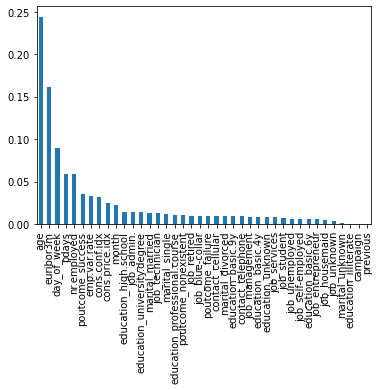

['campaign',
 'education_illiterate',
 'marital_unknown',
 'job_unknown',
 'job_housemaid',
 'job_entrepreneur',
 'education_basic.6y',
 'job_self-employed',
 'job_unemployed',
 'job_student',
 'job_services',
 'education_unknown',
 'education_basic.4y',
 'job_management',
 'contact_telephone',
 'education_basic.9y',
 'marital_divorced',
 'contact_cellular',
 'poutcome_failure',
 'job_blue-collar',
 'job_retired',
 'poutcome_nonexistent',
 'education_professional.course',
 'marital_single',
 'job_technician',
 'marital_married',
 'education_university.degree',
 'job_admin.',
 'education_high.school',
 'month',
 'cons.price.idx',
 'cons.conf.idx',
 'emp.var.rate',
 'poutcome_success',
 'nr.employed',
 'pdays',
 'day_of_week',
 'euribor3m',
 'age']

In [144]:
feature_importances = pd.Series(model.feature_importances_, index = col_set)
feature_importances
feature_importances.nlargest(40).plot(kind='bar')
plt.show()
feature_importances = feature_importances.sort_values()
best_feature = feature_importances[1:40]
best_feature_set = []
for i in best_feature.index:
    best_feature_set.append(i)
best_feature_set

In [145]:
feature_importances


previous                         0.000000
campaign                         0.000009
education_illiterate             0.000327
marital_unknown                  0.000907
job_unknown                      0.003179
job_housemaid                    0.005111
job_entrepreneur                 0.005534
education_basic.6y               0.005820
job_self-employed                0.005999
job_unemployed                   0.006075
job_student                      0.006480
job_services                     0.007870
education_unknown                0.007888
education_basic.4y               0.007908
job_management                   0.008297
contact_telephone                0.009162
education_basic.9y               0.009586
marital_divorced                 0.009668
contact_cellular                 0.009712
poutcome_failure                 0.009918
job_blue-collar                  0.009919
job_retired                      0.009926
poutcome_nonexistent             0.010572
education_professional.course    0

## As can be seen, features that were originally relatively large in value have been scaled so that the importance of the features is reduced.

In [146]:
X = df1[best_feature_set]
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [147]:
classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.9520732686393898


### Filtering methods


Let's select features smarter, namely through the calculation of some function for each feature. Based on the values ​​of this function, we will leave the most important features. The methods of this family are called filter methods.

As such a function, we will consider t-statistics:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-} }},$$

where $\mu$, $\sigma$, $n$ are the mean, standard deviation, and number of objects of each class, respectively.

__Task 9.__ Leave 40 features with the highest $t$ value and measure the quality. Don't forget to measure the feature selection rate in this case.

In [148]:
X = df3.drop(columns=['duration', 'y'])
y = df3['y']

In [149]:
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: y, Length: 41188, dtype: int64

In [150]:
X

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,1
1,57,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,1
2,37,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,1
3,40,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,1
4,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,1,0,1,0
41184,46,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,1,0,1,0
41185,56,11,5,2,999,0,-1.1,94.767,-50.8,1.028,...,0,0,0,1,0,0,1,0,1,0
41186,44,11,5,1,999,0,-1.1,94.767,-50.8,1.028,...,0,0,1,0,0,0,1,0,1,0


In [151]:
colnames = []
for i in X.columns:
    colnames.append(i)

In [152]:
colnames

['age',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'contact_cellular',
 'contact_telephone']

In [153]:
import scipy.stats as stats
res = dict()
for i in colnames:
    ans = stats.ttest_rel(X[i], y)
    res[i] = ans

In [154]:
res.values()

dict_values([Ttest_relResult(statistic=761.1150564089858, pvalue=0.0), Ttest_relResult(statistic=558.9868728975545, pvalue=0.0), Ttest_relResult(statistic=292.9213465977067, pvalue=0.0), Ttest_relResult(statistic=123.23592882279982, pvalue=0.0), Ttest_relResult(statistic=1044.6672858227496, pvalue=0.0), Ttest_relResult(statistic=-224.5360119460571, pvalue=0.0), Ttest_relResult(statistic=-108.46047070033126, pvalue=0.0), Ttest_relResult(statistic=30310.09563615789, pvalue=0.0), Ttest_relResult(statistic=-1804.0255278089926, pvalue=0.0), Ttest_relResult(statistic=333.3334819545996, pvalue=0.0), Ttest_relResult(statistic=14533.698423839487, pvalue=0.0), Ttest_relResult(statistic=-354.2777448252139, pvalue=0.0), Ttest_relResult(statistic=-100.35874794869648, pvalue=0.0), Ttest_relResult(statistic=-218.4994034085428, pvalue=0.0), Ttest_relResult(statistic=-562.4987675329631, pvalue=0.0), Ttest_relResult(statistic=-235.97064958596314, pvalue=0.0), Ttest_relResult(statistic=-266.573299701276,

In [155]:
a = sorted(res.items(), key=lambda x: x[1], reverse=True)

In [156]:
a = a[:39]

In [157]:
col = []

In [158]:
for i in range(39):
    col.append(a[i][0])

In [159]:
col

['cons.price.idx',
 'nr.employed',
 'pdays',
 'age',
 'month',
 'euribor3m',
 'day_of_week',
 'campaign',
 'poutcome_nonexistent',
 'contact_cellular',
 'marital_married',
 'emp.var.rate',
 'contact_telephone',
 'education_university.degree',
 'marital_single',
 'previous',
 'job_admin.',
 'education_high.school',
 'job_blue-collar',
 'job_technician',
 'education_basic.9y',
 'education_professional.course',
 'marital_divorced',
 'poutcome_failure',
 'education_basic.4y',
 'job_services',
 'job_management',
 'poutcome_success',
 'education_basic.6y',
 'job_retired',
 'education_unknown',
 'job_self-employed',
 'job_entrepreneur',
 'job_student',
 'job_unemployed',
 'job_housemaid',
 'job_unknown',
 'marital_unknown',
 'education_illiterate']

In [160]:
X = df3[col]
y = df3['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [161]:
classifier = LogisticRegression(random_state=777)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)
#your code here

0.9502508926964348


### Wrapper methods

__Task 10 (1 point).__

The third of the methods we are considering works as follows: we exclude one of the features in turn and see how this affects the quality. We remove the features in such a greedy way until some condition is met (the number of features or deterioration in quality).

Note that it is impossible to evaluate the quality of the test sample, otherwise we can overfit, as, for example, when tuning hyperparameters. Divide the training sample into 2 parts, train the model without one of the features on one of them, evaluate the quality on the second part. The initial test sample should only be used for the final quality assessment.

Again, leave only 40 features and evaluate the quality on the test sample. How long did this feature selection take?

In [162]:
%%time
y = df4['y']
auc_set = dict()
for i in colnames:
    X = df4.drop(columns=['duration', 'y',i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
    classifier = LogisticRegression(random_state=777)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    # Use AUC function to calculate the area under the curve of precision recall curve
    auc_precision_recall = auc(recall, precision)
    auc_set[i] = auc_precision_recall
    print(auc_precision_recall)

0.947673726751635
0.9468226309181993
0.9483524677573864
0.9489670980532996
0.9481154839321426
0.9474185601559401
0.9469334665680459
0.9531348236610577
0.950236473498064
0.9477510815193761
0.9523764941430843
0.9478683353622507
0.9465336752701661
0.946749434243102
0.9469022753315004
0.9485865881423005
0.9470593671096348
0.9486199726773001
0.9480632099260357
0.9468871308508942
0.9463082236109338
0.9488542716747581
0.946721583506714
0.9468751952633534
0.9496807953792512
0.9493242044046342
0.9493576332873239
0.946762990245846
0.9468744367152713
0.9481703195643874
0.948894696977387
0.946852073640106
0.9494141926450241
0.946500286298717
0.946922279863165
0.9468437567810837
0.9467719309221407
0.9481267143131966
0.9483753086679287
0.9464056629649145
CPU times: user 35.1 s, sys: 13.6 s, total: 48.6 s
Wall time: 13.1 s


In [163]:
auc_set = sorted(auc_set.items(), key=lambda x: x[1], reverse=True)

In [164]:
auc_set[:39]

[('cons.price.idx', 0.9531348236610577),
 ('nr.employed', 0.9523764941430843),
 ('cons.conf.idx', 0.950236473498064),
 ('job_technician', 0.9496807953792512),
 ('education_professional.course', 0.9494141926450241),
 ('job_unknown', 0.9493576332873239),
 ('job_unemployed', 0.9493242044046342),
 ('campaign', 0.9489670980532996),
 ('education_high.school', 0.948894696977387),
 ('job_self-employed', 0.9488542716747581),
 ('job_entrepreneur', 0.9486199726773001),
 ('job_admin.', 0.9485865881423005),
 ('contact_cellular', 0.9483753086679287),
 ('day_of_week', 0.9483524677573864),
 ('education_basic.9y', 0.9481703195643874),
 ('poutcome_success', 0.9481267143131966),
 ('pdays', 0.9481154839321426),
 ('job_housemaid', 0.9480632099260357),
 ('marital_divorced', 0.9478683353622507),
 ('euribor3m', 0.9477510815193761),
 ('age', 0.947673726751635),
 ('previous', 0.9474185601559401),
 ('job_blue-collar', 0.9470593671096348),
 ('emp.var.rate', 0.9469334665680459),
 ('education_unknown', 0.9469222798

In [165]:
#your code here

It is worth noting that using this method, you can go in the opposite direction. Try to _add_ one of the most useful features to the sample until there are 40 pieces. Is there a threshold at which adding the following features will only worsen the quality of the model?

In [166]:
y = df4['y']
auc_set = []
col = []
for i in colnames:
    col.append(i)
    X = df4[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
    classifier = LogisticRegression(random_state=777)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    # Use AUC function to calculate the area under the curve of precision recall curve
    auc_precision_recall = auc(recall, precision)
    auc_set.append(auc_precision_recall)

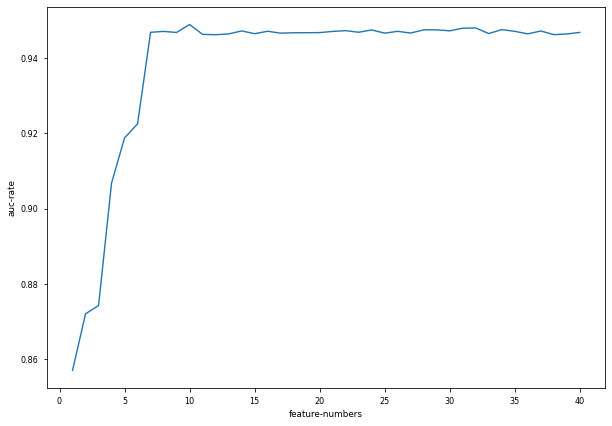

In [167]:
plt.figure(figsize = (10, 7))
plt.style.use('seaborn-paper')
plt.plot(range(1,len(colnames)+1),auc_set)
plt.xlabel('feature-numbers')
plt.ylabel('auc-rate')
plt.show()

# It can be seen that the highest accuracy rate is achieved at the tenth feature
#your code here

Let's sum up the feature selection. List the advantages and disadvantages of each method. Which method led to the best quality?

**Answer:**I think the best approach is to gradually add one feature at a time to the training. But the operation is also more tedious. Undoubtedly, we achieve the highest accuracy with this method, which is much better than the one-click library transfer method. We can tell what impact each feature addition has and whether the results have improved or decreased.
And sklearn's feature filtering is simple and easy to operate, but of course not the best in terms of efficiency. The t-test method, on the other hand, I think it is very statistically significant and suitable for statisticians.

# Part 3. Evaluation of the economic effect of the model

In this part, we will deal with what you are most likely to need in a real job (besides rewriting `json`, of course). Namely: we will collect several specialized quality metrics, try to tune the model to maximize _profit_ and estimate how much we can actually earn from this. Of course, a lot of simplifying assumptions will be made here, but first things first.

__Task 11.__ Let's say your call center employees receive $1 per call to a customer. If the client agrees to the proposed conditions, he will bring $10 to the bank.

If you listened to everything on the economy, then we recall that revenue is how much money customers brought us, and profit is revenue minus salary costs and so on.

Load the telemarketing data from the previous task block. In this part, you do not need to divide the sample - we will use cross-validation. Use 5 folds, do `shuffle=True, random_state=500`. By cross-validation, you will get 5 options for training and test sets. Train logistic regression on each training set (use one-hot for categorical features, leave hyperparameters at their defaults) and make predictions for the corresponding test sets. Let's say your employees decide to call all the positive forecasts. Calculate the revenue on all test samples and average. How much money do you earn on average? Also calculate the standard deviation.

How much of the money you earn will have to give to your call center operators?

In [168]:
df6 = df5.copy()
df6['target'] = df6['y'] * 10 - df6['campaign']
df6

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,target
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,1,9
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,1,9
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,1,9
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,1,9
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,1,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,0,-1.1,94.767,-50.8,...,0,1,0,0,0,1,0,1,0,-1
41184,46,11,5,383,1,999,0,-1.1,94.767,-50.8,...,0,1,0,0,0,1,0,1,0,9
41185,56,11,5,189,2,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,1,0,1,0,8
41186,44,11,5,442,1,999,0,-1.1,94.767,-50.8,...,0,1,0,0,0,1,0,1,0,-1


**I need to pay $105,754**

In [169]:
y_sum = np.sum(y_pred)
y_mean = np.mean(y_pred)
y_std = np.std(y_pred)
print('sum = %s, mean = %s, std = %s' %(y_sum, y_mean, y_std))

sum = 7295, mean = 0.9187657430730478, std = 0.27319453220823814


Let's add some randomness. Now let the client who agrees to the terms bring not 10 dollars, but a random value uniformly distributed in the interval $[0;20)$. Do all the same steps. To simulate a real situation, **DO NOT** fix `random_seed` when calculating customer revenue. What happened?

In [173]:
#your code here
from sklearn.model_selection import cross_val_predict
df7 = df5.copy()
df7['target'] = np.random.randint(0,20) * df7['y'] - df7['campaign']
df7

X = df7.drop(['y', 'target'], axis=1) 
y = df7['target']
classifier = LogisticRegression(random_state=500)
y_pred = cross_val_predict(classifier, X, y, cv=5)
y_sum = np.sum(y_pred)
y_mean = np.mean(y_pred)
y_std = np.std(y_pred)
print('sum = %s, mean = %s, std = %s' %(y_sum, y_mean, y_std))


sum = 696651, mean = 16.913931242109353, std = 4.411782140272906


Adjust the cross-validation coefficient of the regularization of the model to maximize profit (consider as a random variable above). Did you get any win? At what regularization coefficient and profit is maximum? Plot expected profit versus odds, also specify standard deviations (`plt.errorbar` will help you).

In [174]:
#your code here
from tqdm import tqdm
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500]
y_preds = [cross_val_predict(LogisticRegression(penalty='l2', C=c), X, y, cv=5) for c in tqdm(Cs)]

100%|█████████████████████████████████████████████| 8/8 [03:42<00:00, 27.77s/it]


Try to run iteration several times. Is there the same "best" coefficient every time? Is there any pattern? What conclusions can you draw from this?

In [175]:
C_best = Cs[np.argmax(np.array([y_pred.mean() for y_pred in y_preds]))]
print(C_best)
y_pred = y_preds[Cs.index(C_best)]

0.01


In [176]:
df7['y']

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: y, Length: 41188, dtype: int64

In [177]:
df7['campaign']

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 41188, dtype: int64

## Note：odd = p/(1-p)

In [178]:
yerr = np.linspace(0.05, 0.2, 10)

In [179]:
y_pred

array([18, 18, 18, ..., 18, 18, 18])

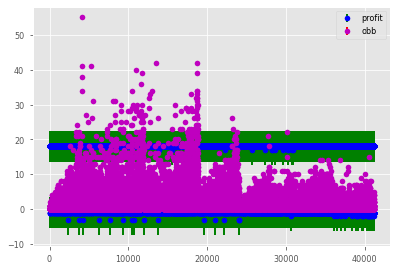

In [182]:
#your code here
# d = {1: 0, 0: 1}

y2 =  ((df7['campaign']-df7['y'])/df7['campaign'])/(1-(df7['campaign']-df7['y'])/df7['campaign'])
#dy = abs(y_pred - df7['target'])
x = [c for c in range(1,len(df7)+1)]
plt.style.use('ggplot')
plt.errorbar(x=x, y=y_pred, yerr = np.std(y_pred),fmt = 'o', ecolor = 'g',color = 'b',elinewidth = 2, capsize = 4, label = 'profit')
plt.errorbar(x=x, y=y2, yerr = np.std(y2),fmt = 'o', ecolor = 'r',color = 'm',elinewidth = 2, capsize = 4,label = 'obb')
plt.legend()

In [183]:
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

__Task 12.__ We have already described an approximate economic model of your task above. What do you think is more important for your business - good precision or recall models? Why?

__Answer:__


Recall that in fact, logistic regression predicts for us the probabilities of a positive class for an object. Perhaps by adjusting the binarization threshold for these probabilities, we can get some kind of gain? Test your reasoning above by adjusting the binarization threshold on cross-validation to maximize profits. Use a grid from 0 to 1 with a step of 0.01. Recall that lowering the threshold gives us higher recall and lower precision, and vice versa.

In [667]:
from sklearn.preprocessing import Binarizer

In [668]:
grid = np.arange(0, 1, 0.01)
#your code here

In [669]:
grid

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [670]:
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

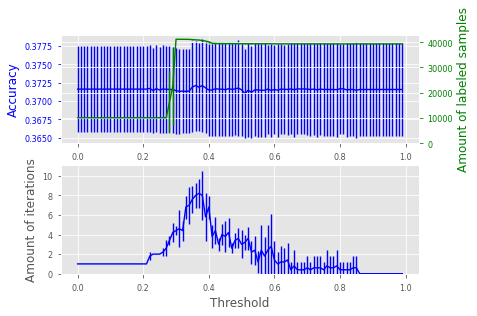

In [671]:
n_splits = 5
total_samples = y.shape[0]

base_classifier = LogisticRegression(random_state=500)

x_values = np.arange(0, 1, 0.01)
#x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))
precision_scores = []
recall_scores = []
for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        #y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        # The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        # The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred, average='micro'))
        recall_scores.append(recall_score(y_test, y_pred, average='micro'))

        scores[i, fold] = accuracy_score(y_test, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="b"
)
ax1.set_ylabel("Accuracy", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="g",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of labeled samples", color="g")
ax2.tick_params("y", colors="g")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of iterations")
ax3.set_xlabel("Threshold")

plt.show()

Build a graph of the dependence of profit on the binarization threshold, also mark the standard deviations on it. Select the best threshold.

Question: Do you notice any pattern? For the correct answer to this question, try to run several times and think about why the threshold is obtained in a particular area?

What are the values of precision and recall at the selected threshold? Evaluate by cross-validation. Also calculate the standard deviation.

In [672]:
precision_scores

[0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.37484826414178196,
 0.37327021121631465,
 0.3739225446157582,
 0.3599611509044555,
 0.3760621510075261,
 0.3748482641417

In [673]:
precision = np.sum(np.array(precision_scores).reshape(-1, 5), axis=1)/5

In [676]:
recall = np.sum(np.array(recall_scores).reshape(-1, 5), axis=1)/5

In [ ]:
len(precision_scores)

In [ ]:
len(y_pred)

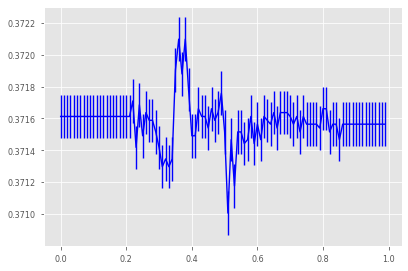

In [679]:
plt.errorbar(
    x_values, precision,yerr=np.std(precision), capsize=2, color="b"
)
plt.show()
#plt.errorbar(
 #   x_values, y_pred.mean, yerr=np.std(y_pred), capsize=2, color="b"
#)
#plt.show()

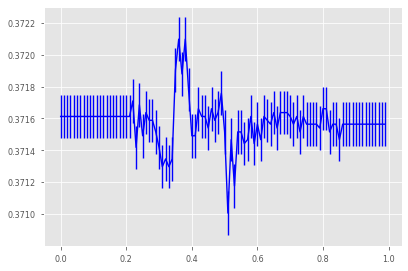

In [678]:
plt.errorbar(
   x_values, recall, yerr=np.std(recall), capsize=2, color="b"
)
plt.show()

In [680]:
total_samples = y.shape[0]

base_classifier = LogisticRegression(random_state=500)

self_training_clf = SelfTrainingClassifier(base_classifier, threshold=0.36)
n_splits = 5
    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
skfolds = StratifiedKFold(n_splits=n_splits)
precision_scores = []
recall_scores = []
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    self_training_clf.fit(X_train, y_train)
    y_pred = self_training_clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, average='micro'))
    recall_scores.append(recall_score(y_test, y_pred, average='micro'))

    scores[i, fold] = accuracy_score(y_test, y_pred)
#your code here

## The selected thresholds, recall and precision are these.

In [683]:
np.mean(precision_scores),np.mean(recall_scores)

(0.37209843091306666, 0.37209843091306666)

As you probably already figured out, your model tends to have a higher recall. Try to evaluate the quality of the model using `PR-AUC` in the $\geq$ 0.5 recall zone. Do it this way - select only those thresholds that achieve the desired recall, then interpret the unit square clipping rectangle as a new unit square and calculate the area under the clipping curve.

In [ ]:
#your code here

__Bonus:__ what did you eat for breakfast on the day of this homework? ))

__Answer:__

**I love Belarusian peach-flavoured cereal with a side of eggs. (The fact that I can't get out of bed in the morning after staying up late doing homework is all about replenishing my sleep. Maybe a little stimulating smelling food is more of a stress reliever)**